# Image Preprocessing

**Tutorials**

- https://circuitdigest.com/tutorial/image-segmentation-using-opencv
- https://realpython.com/python-opencv-color-spaces/
- https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

## Exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np

In [2]:
filename = "../data/raw/raw/color/Apple___healthy/0055dd26-23a7-4415-ac61-e0b44ebfaf80___RS_HL 5672.JPG"

In [3]:
image = cv2.imread(filename)

In [4]:
def view_image(image, title="Image"):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
view_image(image)

In [6]:
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
view_image(image_grayscale, "Grayscale")

In [7]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .   
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .   
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \

In [8]:
image_edged = cv2.Canny(image_grayscale, 200, 500)
view_image(image_edged, "Edges")

In [9]:
image_edged_copy = image_edged.copy()

In [10]:
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p

In [11]:
contours, hierarchy = cv2.findContours(image_edged_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [12]:
contours

[array([[[130, 185]],
 
        [[130, 186]],
 
        [[131, 187]],
 
        [[131, 188]],
 
        [[132, 189]],
 
        [[131, 190]],
 
        [[130, 191]],
 
        [[129, 191]],
 
        [[130, 192]],
 
        [[131, 192]],
 
        [[132, 192]],
 
        [[133, 192]],
 
        [[134, 192]],
 
        [[135, 192]],
 
        [[136, 192]],
 
        [[137, 192]],
 
        [[136, 192]],
 
        [[135, 192]],
 
        [[134, 192]],
 
        [[133, 192]],
 
        [[132, 192]],
 
        [[131, 192]],
 
        [[130, 191]],
 
        [[131, 190]],
 
        [[132, 190]],
 
        [[132, 189]],
 
        [[133, 188]],
 
        [[134, 188]],
 
        [[135, 189]],
 
        [[136, 189]],
 
        [[137, 189]],
 
        [[138, 188]],
 
        [[139, 188]],
 
        [[140, 188]],
 
        [[139, 188]],
 
        [[138, 188]],
 
        [[137, 189]],
 
        [[136, 189]],
 
        [[135, 189]],
 
        [[134, 188]],
 
        [[133, 188]],
 
        [[132, 1

In [13]:
len(contours)

88

In [14]:
view_image(image_edged_copy)

In [15]:
help(cv2.drawContours)

Help on built-in function drawContours:

drawContours(...)
    drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
    .   @brief Draws contours outlines or filled contours.
    .   
    .   The function draws contour outlines in the image if \f$\texttt{thickness} \ge 0\f$ or fills the area
    .   bounded by the contours if \f$\texttt{thickness}<0\f$ . The example below shows how to retrieve
    .   connected components from the binary image and label them: :
    .   @include snippets/imgproc_drawContours.cpp
    .   
    .   @param image Destination image.
    .   @param contours All the input contours. Each contour is stored as a point vector.
    .   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    .   @param color Color of the contours.
    .   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
    .   thickness

In [16]:
cv2.drawContours(image,contours, -1, (0,255,0), 3)

array([[[138, 138, 156],
        [114, 114, 132],
        [153, 153, 171],
        ...,
        [119, 118, 138],
        [138, 137, 157],
        [134, 133, 153]],

       [[134, 134, 152],
        [108, 108, 126],
        [113, 113, 131],
        ...,
        [113, 112, 132],
        [143, 142, 162],
        [122, 121, 141]],

       [[ 90,  90, 108],
        [119, 119, 137],
        [113, 113, 131],
        ...,
        [ 84,  83, 103],
        [104, 103, 123],
        [109, 108, 128]],

       ...,

       [[192, 195, 200],
        [197, 200, 205],
        [199, 202, 207],
        ...,
        [190, 191, 201],
        [190, 191, 201],
        [190, 191, 201]],

       [[193, 196, 201],
        [199, 202, 207],
        [201, 204, 209],
        ...,
        [190, 191, 201],
        [190, 191, 201],
        [190, 191, 201]],

       [[195, 198, 203],
        [201, 204, 209],
        [201, 204, 209],
        ...,
        [190, 191, 201],
        [190, 191, 201],
        [189, 190, 200]]

In [17]:
view_image(image)

In [18]:
# convex hulls

image_copy = image.copy()
image_gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [20]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
    #view_image(image)
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0,255,0), 2)

In [21]:
view_image(image)

## Preprocessing Images


Based on [this](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/).

In [3]:
import glob
import os
import random
import numpy as np
import pandas as pd

from PIL import Image


def find_image_files(data_dir, file_ext="JPG"):
    return glob.glob(os.path.join(data_dir, f"*.{file_ext}"))


def random_filename(filenames):
    idx = random.randint(0, len(filenames))
    return filenames[idx]


def preprocess_image(filename, normalize=True, standardize=True):
    image = load_image(filename)
    pixel_values = convert_to_pixel_values(image, normalize, standardize)
    pixel_values.reshape(-1, image.size[0], image.size[1], 1)
    return pixel_values


def load_image(filename):
    """ Load image and optionaly split into different channels """
    image = Image.open(filename)
    print(f"LOADED {filename}\n{image.format} {image.mode} {image.size}")
    return image


def convert_to_pixel_values(image, normalize, standardize):
    """ Convert image to array of pixel values """
    pixels = np.asarray(image)
    if normalize:
        pixels = normalize_pixel_values(pixels)
    if standardize:
        pixels = standardize_pixel_values(pixels)
    return pixels


def normalize_pixel_values(pixels):
    """ Normalize pixel values to be in the range [0, 1] """
    print('Data Type: %s' % pixels.dtype)
    print('BEFORE NORMALIZATION Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
    pixels = pixels.astype('float32')
    pixels /= 255.0
    print('AFTER NORMALIZATION Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
    return pixels


def standardize_pixel_values(pixels):
    """ Globally standardize pixel values to positive """
    mean, std = pixels.mean(), pixels.std()
    print('BEFORE STANDARDIZATION Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
    pixels = (pixels - mean) / std
    pixels = np.clip(pixels, -1.0, 1.0)
    pixels = (pixels + 1.0) / 2.0
    mean, std = pixels.mean(), pixels.std()
    print('AFTER STANDARDIZATION Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
    print('AFTER STANDARDIZATION Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
    return pixels

In [4]:
image_files = find_image_files("../data/raw/raw/color/Apple___healthy/", file_ext="JPG")
filename = random_filename(image_files)

In [5]:
image = load_image(filename)
pixel_values = convert_to_pixel_values(image, normalize=True, standardize=True)

LOADED ../data/raw/raw/color/Apple___healthy/4b186022-c0ab-4a26-9930-c7944a3c431e___RS_HL 7389.JPG
JPEG RGB (256, 256)
Data Type: uint8
BEFORE NORMALIZATION Min: 0.000, Max: 255.000
AFTER NORMALIZATION Min: 0.000, Max: 1.000
BEFORE STANDARDIZATION Mean: 0.524, Standard Deviation: 0.229
AFTER STANDARDIZATION Mean: 0.556, Standard Deviation: 0.377
AFTER STANDARDIZATION Min: 0.000, Max: 1.000


In [6]:
preprocessed_image = preprocess_image(filename, normalize=True, standardize=True)

LOADED ../data/raw/raw/color/Apple___healthy/4b186022-c0ab-4a26-9930-c7944a3c431e___RS_HL 7389.JPG
JPEG RGB (256, 256)
Data Type: uint8
BEFORE NORMALIZATION Min: 0.000, Max: 255.000
AFTER NORMALIZATION Min: 0.000, Max: 1.000
BEFORE STANDARDIZATION Mean: 0.524, Standard Deviation: 0.229
AFTER STANDARDIZATION Mean: 0.556, Standard Deviation: 0.377
AFTER STANDARDIZATION Min: 0.000, Max: 1.000


In [7]:
image_files

['../data/raw/raw/color/Apple___healthy/603b96cc-3237-4ddf-97b9-11ddbf4840f0___RS_HL 7598.JPG',
 '../data/raw/raw/color/Apple___healthy/7c388477-2953-4b3d-8f22-7f9eed5fff5c___RS_HL 7527.JPG',
 '../data/raw/raw/color/Apple___healthy/24adc938-da71-4d2a-9c7e-f2dc3a73c908___RS_HL 7307.JPG',
 '../data/raw/raw/color/Apple___healthy/ea45b7c8-f1c2-42c0-bfec-96444c58ddd0___RS_HL 6004.JPG',
 '../data/raw/raw/color/Apple___healthy/0adc1c5b-8958-47c0-a152-f28078c214f1___RS_HL 7825.JPG',
 '../data/raw/raw/color/Apple___healthy/ce9a3738-55ea-4974-8539-922ed4f864b8___RS_HL 6175.JPG',
 '../data/raw/raw/color/Apple___healthy/f76ff409-9723-4b89-83f9-1ff33edaffbc___RS_HL 7331.JPG',
 '../data/raw/raw/color/Apple___healthy/a0670cfe-00e2-4c7a-a9f7-29408debdc3a___RS_HL 6061.JPG',
 '../data/raw/raw/color/Apple___healthy/b5ff5168-38d9-4a8b-b5bb-94c310e77b53___RS_HL 6083.JPG',
 '../data/raw/raw/color/Apple___healthy/96717630-6d48-4660-b472-268f5f1304d9___RS_HL 7978.JPG',
 '../data/raw/raw/color/Apple___healthy/

In [8]:
input_data = np.asarray(list(map(preprocess_image, image_files)))

LOADED ../data/raw/raw/color/Apple___healthy/603b96cc-3237-4ddf-97b9-11ddbf4840f0___RS_HL 7598.JPG
JPEG RGB (256, 256)
Data Type: uint8
BEFORE NORMALIZATION Min: 0.000, Max: 251.000
AFTER NORMALIZATION Min: 0.000, Max: 0.984
BEFORE STANDARDIZATION Mean: 0.458, Standard Deviation: 0.181
AFTER STANDARDIZATION Mean: 0.520, Standard Deviation: 0.365
AFTER STANDARDIZATION Min: 0.000, Max: 1.000
LOADED ../data/raw/raw/color/Apple___healthy/7c388477-2953-4b3d-8f22-7f9eed5fff5c___RS_HL 7527.JPG
JPEG RGB (256, 256)
Data Type: uint8
BEFORE NORMALIZATION Min: 0.000, Max: 255.000
AFTER NORMALIZATION Min: 0.000, Max: 1.000
BEFORE STANDARDIZATION Mean: 0.438, Standard Deviation: 0.238
AFTER STANDARDIZATION Mean: 0.489, Standard Deviation: 0.393
AFTER STANDARDIZATION Min: 0.000, Max: 1.000
LOADED ../data/raw/raw/color/Apple___healthy/24adc938-da71-4d2a-9c7e-f2dc3a73c908___RS_HL 7307.JPG
JPEG RGB (256, 256)
Data Type: uint8
BEFORE NORMALIZATION Min: 0.000, Max: 255.000
AFTER NORMALIZATION Min: 0.000, 

In [93]:
input_data.shape

(1645, 256, 256, 3)

## Preparing Labels

In [20]:
BASE_DIR = "../data/raw/raw/color"

data_dirs = sorted(os.listdir(BASE_DIR))
data_dirs

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [42]:
data = {
    "Filename": [],
    "Label": [],
    "Species": [],
    "Disease": [],
}


for i, data_dir in enumerate(data_dirs):
    folder_path = os.path.join(BASE_DIR, data_dir)
    
    print(folder_path)
    image_files = list(map(os.path.basename, find_image_files(folder_path)))
    species, disease = data_dir.split("___")
    diseases = [disease for _ in range(len(image_files))]
    species = [species for _ in range(len(image_files))]
    labels = [i for _ in range(len(image_files))]
    
    data["Filename"].extend(image_files)
    data["Label"].extend(labels)
    data["Species"].extend(species)
    data["Disease"].extend(diseases)

df = pd.DataFrame(data)

../data/raw/raw/color/Apple___Apple_scab
../data/raw/raw/color/Apple___Black_rot
../data/raw/raw/color/Apple___Cedar_apple_rust
../data/raw/raw/color/Apple___healthy
../data/raw/raw/color/Blueberry___healthy
../data/raw/raw/color/Cherry_(including_sour)___Powdery_mildew
../data/raw/raw/color/Cherry_(including_sour)___healthy
../data/raw/raw/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
../data/raw/raw/color/Corn_(maize)___Common_rust_
../data/raw/raw/color/Corn_(maize)___Northern_Leaf_Blight
../data/raw/raw/color/Corn_(maize)___healthy
../data/raw/raw/color/Grape___Black_rot
../data/raw/raw/color/Grape___Esca_(Black_Measles)
../data/raw/raw/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
../data/raw/raw/color/Grape___healthy
../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)
../data/raw/raw/color/Peach___Bacterial_spot
../data/raw/raw/color/Peach___healthy
../data/raw/raw/color/Pepper,_bell___Bacterial_spot
../data/raw/raw/color/Pepper,_bell___healthy
../data/ra

In [43]:
df

,Filename,Label,Species,Disease
0,95c2cc04-5581-48ca-8001-9644bb488b12___FREC_Sc...,0,Apple,Apple_scab
1,8a212787-77fb-40dc-a028-92d5ff2d6c7c___FREC_Sc...,0,Apple,Apple_scab
2,b10dceaa-a764-46b4-bd61-bc9fb13579ca___FREC_Sc...,0,Apple,Apple_scab
3,d842b34b-d2ab-48fc-9e78-ef586308c359___FREC_Sc...,0,Apple,Apple_scab
4,c270319e-61d4-4376-a3e8-b159ff712dd4___FREC_Sc...,0,Apple,Apple_scab
...,...,...,...,...
52798,6456344c-0dca-4ea8-8ad9-7f2809182e73___RS_HL 9...,37,Tomato,healthy
52799,3e51f746-2ed2-4eb4-96e7-f6717ec068fd___RS_HL 0...,37,Tomato,healthy
52800,ec768816-02c1-4726-9374-b6d0ccec49d2___RS_HL 0...,37,Tomato,healthy
52801,1006c73b-19f8-4771-9fe5-3fc4908e8da3___RS_HL 0...,37,Tomato,healthy


In [12]:
csv_filename = "../data/raw/filename_labels.csv"

df.to_csv(csv_filename, index=False)

In [13]:
pd.read_csv(csv_filename)

,Filename,Label,Species
0,95c2cc04-5581-48ca-8001-9644bb488b12___FREC_Sc...,Apple_scab,Apple
1,8a212787-77fb-40dc-a028-92d5ff2d6c7c___FREC_Sc...,Apple_scab,Apple
2,b10dceaa-a764-46b4-bd61-bc9fb13579ca___FREC_Sc...,Apple_scab,Apple
3,d842b34b-d2ab-48fc-9e78-ef586308c359___FREC_Sc...,Apple_scab,Apple
4,c270319e-61d4-4376-a3e8-b159ff712dd4___FREC_Sc...,Apple_scab,Apple
...,...,...,...
52798,6456344c-0dca-4ea8-8ad9-7f2809182e73___RS_HL 9...,healthy,Tomato
52799,3e51f746-2ed2-4eb4-96e7-f6717ec068fd___RS_HL 0...,healthy,Tomato
52800,ec768816-02c1-4726-9374-b6d0ccec49d2___RS_HL 0...,healthy,Tomato
52801,1006c73b-19f8-4771-9fe5-3fc4908e8da3___RS_HL 0...,healthy,Tomato


In [14]:
df["Filename"]

0        95c2cc04-5581-48ca-8001-9644bb488b12___FREC_Sc...
1        8a212787-77fb-40dc-a028-92d5ff2d6c7c___FREC_Sc...
2        b10dceaa-a764-46b4-bd61-bc9fb13579ca___FREC_Sc...
3        d842b34b-d2ab-48fc-9e78-ef586308c359___FREC_Sc...
4        c270319e-61d4-4376-a3e8-b159ff712dd4___FREC_Sc...
                               ...                        
52798    6456344c-0dca-4ea8-8ad9-7f2809182e73___RS_HL 9...
52799    3e51f746-2ed2-4eb4-96e7-f6717ec068fd___RS_HL 0...
52800    ec768816-02c1-4726-9374-b6d0ccec49d2___RS_HL 0...
52801    1006c73b-19f8-4771-9fe5-3fc4908e8da3___RS_HL 0...
52802    b2497a4d-6951-46d3-810b-7072e908eea9___RS_HL 9...
Name: Filename, Length: 52803, dtype: object

In [15]:
glob.glob(os.path.join("../data/raw/raw/color", "Corn*"))

['../data/raw/raw/color/Corn_(maize)___Common_rust_',
 '../data/raw/raw/color/Corn_(maize)___Northern_Leaf_Blight',
 '../data/raw/raw/color/Corn_(maize)___healthy',
 '../data/raw/raw/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']

In [16]:
os.path.dirname(filename)

'../data/raw/raw/color/Apple___healthy'

In [17]:
df[df["Species"] == "Corn_(maize)"]

,Filename,Label,Species
6579,9a59a663-089f-4722-8bb5-937f18978888___RS_GLSp...,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)
6580,f435553d-4d3b-48a8-b13e-7639d330a001___RS_GLSp...,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)
6581,950e2b3f-a007-48c5-bb85-8c68336a7e76___RS_GLSp...,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)
6582,d07122b2-20b4-4f1b-9071-bd90d77cc478___RS_GLSp...,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)
6583,71deb36b-bebd-4f7e-8ed3-362b1bbf86b2___RS_GLSp...,Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)
...,...,...,...
9103,b14bcb73-04d0-4e27-8cf3-9d26bdc1a8d7___R.S_HL ...,healthy,Corn_(maize)
9104,3b1e3c0f-e493-4d5f-866b-c2274d307471___R.S_HL ...,healthy,Corn_(maize)
9105,e45eb0fd-208b-4447-b4f4-1eaafcb45596___R.S_HL ...,healthy,Corn_(maize)
9106,99df00ea-3fb2-4da9-82e6-972dbfd9e6c2___R.S_HL ...,healthy,Corn_(maize)


In [18]:
df

,Filename,Label,Species
0,95c2cc04-5581-48ca-8001-9644bb488b12___FREC_Sc...,Apple_scab,Apple
1,8a212787-77fb-40dc-a028-92d5ff2d6c7c___FREC_Sc...,Apple_scab,Apple
2,b10dceaa-a764-46b4-bd61-bc9fb13579ca___FREC_Sc...,Apple_scab,Apple
3,d842b34b-d2ab-48fc-9e78-ef586308c359___FREC_Sc...,Apple_scab,Apple
4,c270319e-61d4-4376-a3e8-b159ff712dd4___FREC_Sc...,Apple_scab,Apple
...,...,...,...
52798,6456344c-0dca-4ea8-8ad9-7f2809182e73___RS_HL 9...,healthy,Tomato
52799,3e51f746-2ed2-4eb4-96e7-f6717ec068fd___RS_HL 0...,healthy,Tomato
52800,ec768816-02c1-4726-9374-b6d0ccec49d2___RS_HL 0...,healthy,Tomato
52801,1006c73b-19f8-4771-9fe5-3fc4908e8da3___RS_HL 0...,healthy,Tomato


In [21]:
image_filepath = os.path.join(BASE_DIR, f"{df.iloc[0].Species}___{df.iloc[0].Label}", df.iloc[0].Filename)

LOADED ../data/raw/raw/color/Apple___Apple_scab/95c2cc04-5581-48ca-8001-9644bb488b12___FREC_Scab 3163.JPG
JPEG RGB (256, 256)


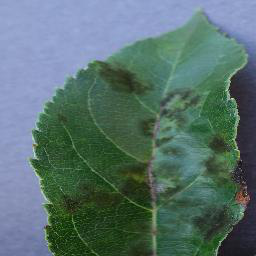

In [22]:
load_image(image_filepath)

In [23]:
import src.data.make_dataset as ds_utils

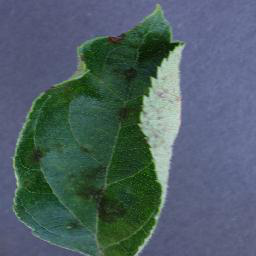

In [26]:
ds_utils.load_image(ds_utils.get_image_filepath(BASE_DIR, df.iloc[101]))

In [27]:
import src.data.make_dataset as ds_utils 

In [48]:
folder_paths = ds_utils.get_folder_paths(BASE_DIR, "Corn")

In [53]:
mapping = ds_utils.create_mapping(folder_paths, "test.csv")

In [65]:
classes = ds_utils.get_classes(mapping.Label.to_list())

In [62]:
classes

1638    Northern_Leaf_Blight
1639    Northern_Leaf_Blight
1640    Northern_Leaf_Blight
1641    Northern_Leaf_Blight
1642    Northern_Leaf_Blight
                ...         
2503    Northern_Leaf_Blight
2504    Northern_Leaf_Blight
2505    Northern_Leaf_Blight
2506    Northern_Leaf_Blight
2507    Northern_Leaf_Blight
Name: Disease, Length: 870, dtype: object

In [66]:
ds_utils.convert_to_one_hot_labels(mapping.Label.to_list(), len(classes))

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [85]:
filenames = mapping.apply(lambda row: ds_utils.get_image_filepath(BASE_DIR, row), axis=1).to_list()

In [86]:
filenames

['../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/9a59a663-089f-4722-8bb5-937f18978888___RS_GLSp 7301.JPG',
 '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/f435553d-4d3b-48a8-b13e-7639d330a001___RS_GLSp 4447.JPG',
 '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/950e2b3f-a007-48c5-bb85-8c68336a7e76___RS_GLSp 4453.JPG',
 '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/d07122b2-20b4-4f1b-9071-bd90d77cc478___RS_GLSp 9310.JPG',
 '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/71deb36b-bebd-4f7e-8ed3-362b1bbf86b2___RS_GLSp 4446.JPG',
 '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/30554ff6-3eef-4d17-8304-de6a8a478f2b___RS_GLSp 4683.JPG',
 '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/79aa374c-1687-42d4-bf48-84e8b1beb762___RS_GLSp 4408.JPG',
 '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/bc690bb9-1611-4744-844d-0ab174467f54___RS_GLSp 4582.JPG',
 '../data/raw/raw/color/../data/

In [87]:
mapping

,Filename,Label,Species,Disease
0,9a59a663-089f-4722-8bb5-937f18978888___RS_GLSp...,0,../data/raw/raw/color/Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot
1,f435553d-4d3b-48a8-b13e-7639d330a001___RS_GLSp...,0,../data/raw/raw/color/Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot
2,950e2b3f-a007-48c5-bb85-8c68336a7e76___RS_GLSp...,0,../data/raw/raw/color/Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot
3,d07122b2-20b4-4f1b-9071-bd90d77cc478___RS_GLSp...,0,../data/raw/raw/color/Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot
4,71deb36b-bebd-4f7e-8ed3-362b1bbf86b2___RS_GLSp...,0,../data/raw/raw/color/Corn_(maize),Cercospora_leaf_spot Gray_leaf_spot
...,...,...,...,...
2524,b14bcb73-04d0-4e27-8cf3-9d26bdc1a8d7___R.S_HL ...,3,../data/raw/raw/color/Corn_(maize),healthy
2525,3b1e3c0f-e493-4d5f-866b-c2274d307471___R.S_HL ...,3,../data/raw/raw/color/Corn_(maize),healthy
2526,e45eb0fd-208b-4447-b4f4-1eaafcb45596___R.S_HL ...,3,../data/raw/raw/color/Corn_(maize),healthy
2527,99df00ea-3fb2-4da9-82e6-972dbfd9e6c2___R.S_HL ...,3,../data/raw/raw/color/Corn_(maize),healthy


In [94]:
species = "Corn"

ds_utils.prepare_dataset(BASE_DIR, species)

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/raw/color/../data/raw/raw/color/Corn_(maize)___0/9a59a663-089f-4722-8bb5-937f18978888___RS_GLSp 7301.JPG'

In [93]:
ds_utils.get_folder_paths(BASE_DIR, "Corn")

['../data/raw/raw/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '../data/raw/raw/color/Corn_(maize)___Common_rust_',
 '../data/raw/raw/color/Corn_(maize)___Northern_Leaf_Blight',
 '../data/raw/raw/color/Corn_(maize)___healthy']

In [108]:
glob.glob(os.path.join(BASE_DIR, "**/*.JPG"), recursive=True)

['../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/2ef91c02-c7fb-4045-94ea-0f0772a9d525___CREC_HLB 5239.JPG',
 '../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/0fc597c4-71cc-4ed9-8a49-d33e06919300___CREC_HLB 6644.JPG',
 '../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/2eebd03f-19bd-4d16-b774-4da90a411453___UF.Citrus_HLB_Lab 1640.JPG',
 '../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/c2931915-611e-4d5b-b76e-8077b0c6cc18___CREC_HLB 6744.JPG',
 '../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/fb255967-da2e-4c2d-a64b-ebc32a152207___UF.Citrus_HLB_Lab 1603.JPG',
 '../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/b2a922d3-de8e-432f-9bf8-a167d1f8645d___CREC_HLB 4313.JPG',
 '../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/ac23c8e7-5320-4440-acef-04f67d53a8b3___CREC_HLB 7611.JPG',
 '../data/raw/raw/color/Orange___Haunglongbing_(Citrus_greening)/5e99cf3c-7ca2-4aa8-bcbf-1cdc55e632fd___CREC_HLB 7

In [106]:
os.path.join(BASE_DIR, "**/*.txt")

'../data/raw/raw/color/**/*.txt'

In [ ]:
**/*.txt